In [1]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

from lightgbm import LGBMClassifier

from lime import lime_tabular

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

sns.set_theme()

In [2]:
data = load_breast_cancer()
X, y = pd.DataFrame(data.data), pd.DataFrame(data.target)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.90,
    test_size=0.1,
    stratify=y,
    random_state=123
)
X_train.columns = data.feature_names
X_train

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
152        9.731         15.34           63.78      300.2          0.10720   
32        17.020         23.98          112.80      899.3          0.11970   
90        14.620         24.02           94.57      662.7          0.08974   
409       12.270         17.92           78.41      466.1          0.08685   
80        11.450         20.97           73.81      401.5          0.11020   
..           ...           ...             ...        ...              ...   
19        13.540         14.36           87.46      566.3          0.09779   
504        9.268         12.87           61.49      248.7          0.16340   
15        14.540         27.54           96.73      658.8          0.11390   
396       13.510         18.89           88.10      558.1          0.10590   
448       14.530         19.34           94.25      659.7          0.08388   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
152           0.15990         0.41080              0.07857         0.2548   
32            0.14960         0.24170              0.12030         0.2248   
90            0.08606         0.03102              0.02957         0.1685   
409           0.06526         0.03211              0.02653         0.1966   
80            0.09362         0.04591              0.02233         0.1842   
..                ...             ...                  ...            ...   
19            0.08129         0.06664              0.04781         0.1885   
504           0.22390         0.09730              0.05252         0.2378   
15            0.15950         0.16390              0.07364         0.2303   
396           0.11470         0.08580              0.05381         0.1806   
448           0.07800         0.08817              0.02925         0.1473   

     mean fractal dimension  ...  worst radius  worst texture  \
152                 0.09296  ...         11.02          19.49   
32                  0.06382  ...         20.88          32.09   
90                  0.05866  ...         16.11          29.11   
409                 0.05597  ...         14.10          28.88   
80                  0.07005  ...         13.11          32.16   
..                      ...  ...           ...            ...   
19                  0.05766  ...         15.11          19.26   
504                 0.09502  ...         10.28          16.38   
15                  0.07077  ...         17.46          37.13   
396                 0.06079  ...         14.80          27.20   
448                 0.05746  ...         16.30          28.39   

     worst perimeter  worst area  worst smoothness  worst compactness  \
152            71.04       380.5            0.1292             0.2772   
32            136.10      1344.0            0.1634             0.3559   
90            102.90       803.7            0.1115             0.1766   
409            89.00       610.2            0.1240             0.1795   
80             84.53       525.1            0.1557             0.1676   
..               ...         ...               ...                ...   
19             99.70       711.2            0.1440             0.1773   
504            69.05       300.2            0.1902             0.3441   
15            124.10       943.2            0.1678             0.6577   
396            97.33       675.2            0.1428             0.2570   
448           108.10       830.5            0.1089             0.2649   

     worst concavity  worst concave points  worst symmetry  \
152          0.82160               0.15710          0.3108   
32           0.55880               0.18470          0.3530   
90           0.09189               0.06946          0.2522   
409          0.13770               0.09532          0.3455   
80           0.17550               0.06127          0.2762   
..               ...                   ...             ...   
19           0.23900               0.12880         

In [3]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
predictions = lgbm.predict(X_test)
print("ROC AUC score = {}".format(roc_auc_score(y_test, predictions)))

C:\Users\pierr\anaconda3\envs\oc_p7_pyth38\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pierr\anaconda3\envs\oc_p7_pyth38\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROC AUC score = 1.0


In [8]:
explainer = lime_tabular.LimeTabularExplainer(
    X_train.to_numpy(),
    mode="classification",
    class_names=data.target_names,
    feature_names=data.feature_names,
)
explainer

In [5]:
idx = random.randint(1, len(X_test))

print("Prediction : ", data.target_names[lgbm.predict(X_test.iloc[idx].to_numpy().reshape(1,-1))[0]])
print("Actual :     ", data.target_names[y_test.iloc[idx]][0])

explanation = explainer.explain_instance(
    X_test.iloc[idx],
    lgbm.predict_proba,
    num_features=len(lgbm.feature_name_)
)

Prediction :  benign
Actual :      benign


In [6]:
explanation.show_in_notebook()

In [87]:
explanation.as_list()

[('worst texture > 29.90', -0.1549674772077142),
 ('0.02 < mean concave points <= 0.03', 0.10834550892575738),
 ('0.10 < worst concave points <= 0.16', 0.0767516854079202),
 ('compactness error <= 0.01', -0.07502196093155807),
 ('worst smoothness > 0.15', -0.07328687600027037),
 ('mean texture > 21.80', -0.06466807496486796),
 ('17.73 < area error <= 24.29', 0.06164657617173931),
 ('0.23 < worst concavity <= 0.39', -0.05709016544740179),
 ('symmetry error <= 0.02', -0.03837479721421823),
 ('0.16 < mean symmetry <= 0.18', -0.033699320587896944),
 ('concave points error <= 0.01', -0.02454995272434788),
 ('13.36 < mean radius <= 15.78', -0.023363226534442623),
 ('0.21 < worst compactness <= 0.34', 0.018290475065511135),
 ('685.55 < worst area <= 1089.75', -0.017835289554900897),
 ('0.02 < concavity error <= 0.03', 0.017703104166496893),
 ('97.62 < worst perimeter <= 125.53', -0.014680408665095743),
 ('worst symmetry > 0.32', -0.013448249334819959),
 ('14.94 < worst radius <= 18.88', -0.01

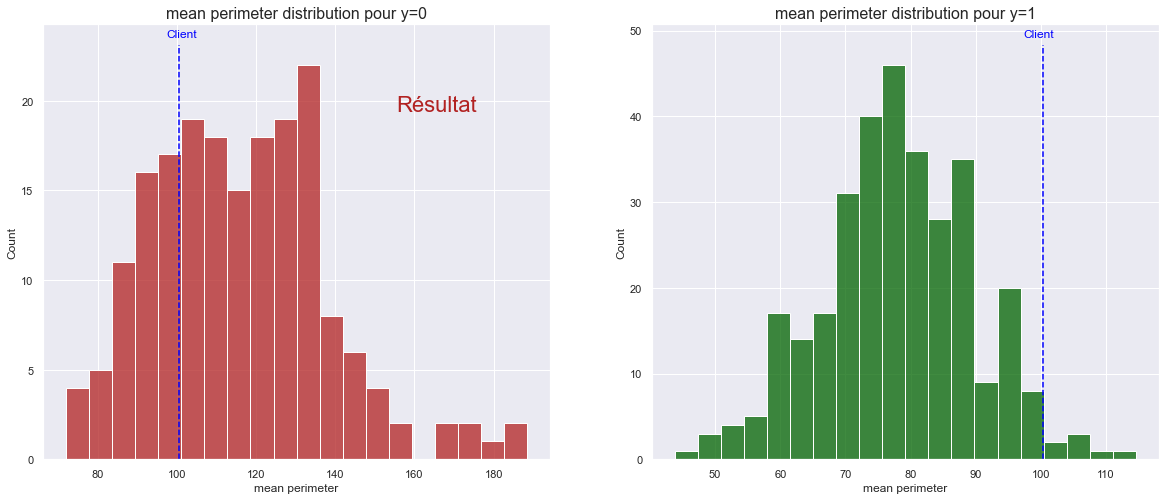

In [194]:
def plot_client_position(X, y, client_id, feature_name):
    target_value = y.iloc[client_id][0]
    plot_data = pd.concat([X.filter(items=[feature_name], axis=1), y], axis=1)

    fig, axes = plt.subplots(figsize=(20, 8), ncols=2)

    axes[0].set_title("{} distribution pour y={}".format(feature_name, 0), fontsize=16)
    sns.histplot(
        data=plot_data[plot_data[0] == 0],
        x=feature_name,
        ax=axes[0],
        bins=20,
        color='firebrick'
    )
    axes[0].vlines(
        x=plot_data.iloc[client_id][feature_name],
        ymin=axes[0].get_ylim()[0],
        ymax=axes[0].get_ylim()[1],
        color='blue',
        linestyle='--'
    )
    axes[0].text(
        plot_data.iloc[client_id][feature_name] * 0.97,
        axes[0].get_ylim()[1] * 0.97,
        "Client",
        color='blue'
    )
    if target_value == 0:
        axes[0].text(
            axes[0].get_xlim()[1] * 0.8,
            axes[0].get_ylim()[1] * 0.8,
            "Résultat",
            fontsize=22,
            color='firebrick'
        )

    axes[1].set_title("{} distribution pour y={}".format(feature_name, 1), fontsize=16)
    sns.histplot(
        data=plot_data[plot_data[0] == 1],
        x=feature_name,
        ax=axes[1],
        bins=20,
        color='darkgreen'
    )
    axes[1].vlines(
        x=plot_data.iloc[client_id][feature_name],
        ymin=axes[1].get_ylim()[0],
        ymax=axes[1].get_ylim()[1],
        color='blue',
        linestyle='--'
    )
    axes[1].text(
        plot_data.iloc[client_id][feature_name] * 0.97,
        axes[1].get_ylim()[1] * 0.97,
        "Client",
        color='blue'
    )
    if target_value == 1:
        axes[1].text(
            axes[1].get_xlim()[1] * 0.8,
            axes[1].get_ylim()[1] * 0.8,
            "Résultat",
            fontsize=22,
            color='darkgreen'
        )

plot_client_position(X_train, y_train, idx, 'mean perimeter')

(0.0, 1.0)

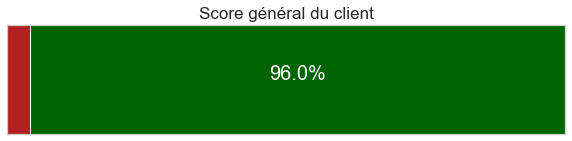

In [43]:
prediction = 0
probability = 0.96
left_bar_w = probability if prediction == 1 else 1 - probability
right_bar_w = probability if prediction == 0 else 1 - probability

fig = plt.figure(figsize=(10, 2))
plt.title("Score général du client", fontsize=17)
plt.barh(
    y=[0, 0],
    width=[left_bar_w, right_bar_w],
    left=[0, left_bar_w],
    height=2,
    color=["firebrick", "darkgreen"]
)
if prediction == 0:
    plt.text(
        left_bar_w + right_bar_w / 2 - 0.05,
        0,
        str(100 * round(right_bar_w, 2)) + '%',
        color='white',
        fontsize=20
    )
else:
    plt.text(
        left_bar_w / 2 - 0.05,
        0,
        str(100 * round(left_bar_w, 2)) + '%',
        color='white',
        fontsize=20
    )

plt.yticks([0], [''])
plt.xticks([0], [''])
plt.ylim(-1, 1)
plt.xlim(0, 1)